# Server and Client Send Actual Sensor Data over Network using Raspberry Pi 

### objective

In this Experiment we shall learn to create our own server and client with raspberyy pi uisng python Socket Programming.

Our Tagrget is to create a server. the server would be Running 24x7 on Raspberry pi and server is always listening for request from client 
When a client request server it shall send the Temperature and Humidty over Network using Socket  Programming

## Video Tutorial can be found below link

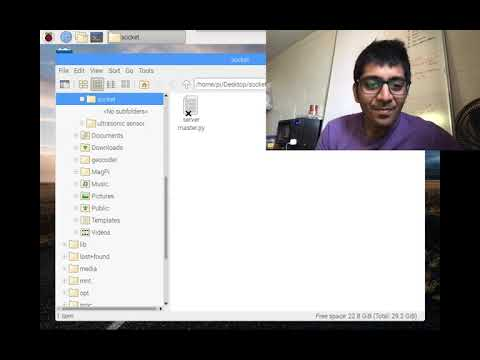

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('QihjI84Z2tQ')

## Getting Started with Raspberry pi 

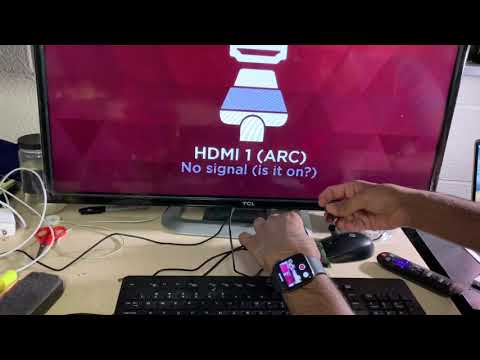

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo('qL2ClHYEuog')

### Connection Diagram

In [14]:
%%html
<img src="http://www.circuitbasics.com/wp-content/uploads/2015/12/How-to-Setup-the-DHT11-on-the-Raspberry-Pi-Three-pin-DHT11-Wiring-Diagram.png" , width=600, height=300>

###  DHT Pinout

In [15]:
%%html
<img src="http://www.circuitbasics.com/wp-content/uploads/2015/12/DHT11-Pinout-for-three-pin-and-four-pin-types-2.jpg" , width=600, height=300>

# Step 1: Create Server

Define the Library

In [2]:
import socket
import numpy as np
import encodings

Define the HOST and PORT 

In [ ]:
HOST = '127.0.0.1'  # Standard loopback interface address (localhost)
PORT = 65432        # Port to listen on (non-privileged ports are > 1023)


For the Experiment we shall send Dummy Data and then once we know the concept we can send actual Sensor value over the socket programming.

### Define the function which will send dummy data when client sends request

In [ ]:
def random_data():

    x1 = np.random.randint(0, 55, None)         # Dummy temperature
    y1 = np.random.randint(0, 45, None)         # Dummy humidigy
    my_sensor = "{},{}".format(x1,y1)
    return my_sensor                            # return data seperated by comma


### Define the actual server when client sends string Data it shall send Data 

In [ ]:
def my_server():

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        print("Server Started waiting for client to connect ")
        s.bind((HOST, PORT))
        s.listen(5)
        conn, addr = s.accept()

        with conn:
            print('Connected by', addr)
            while True:

                data = conn.recv(1024).decode('utf-8')

                if str(data) == "Data":

                    print("Ok Sending data ")

                    my_data = random_data()

                    x_encoded_data = my_data.encode('utf-8')

                    conn.sendall(x_encoded_data)

                elif  str(data) == "Quit":
                    print("shutting down server ")
                    break


                if not data:
                    break
                else:
                    pass

In [ ]:
if __name__ == '__main__':
    while 1:
        my_server()

### Explanation

when client sends Data as a string server will send sensor data over the network 

# Entire Code for Server

In [ ]:
import socket
import numpy as np
import encodings

HOST = '127.0.0.1'  # Standard loopback interface address (localhost)
PORT = 65432        # Port to listen on (non-privileged ports are > 1023)


def random_data():

    x1 = np.random.randint(0, 55, None)         # Dummy temperature
    y1 = np.random.randint(0, 45, None)         # Dummy humidigy
    my_sensor = "{},{}".format(x1,y1)
    return my_sensor                            # return data seperated by comma




def my_server():

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        print("Server Started waiting for client to connect ")
        s.bind((HOST, PORT))
        s.listen(5)
        conn, addr = s.accept()

        with conn:
            print('Connected by', addr)
            while True:

                data = conn.recv(1024).decode('utf-8')

                if str(data) == "Data":

                    print("Ok Sending data ")

                    my_data = random_data()

                    x_encoded_data = my_data.encode('utf-8')

                    conn.sendall(x_encoded_data)

                elif  str(data) == "Quit":
                    print("shutting down server ")
                    break


                if not data:
                    break
                else:
                    pass


if __name__ == '__main__':
    while 1:
        my_server()

# Step 2: Write the Code for Client 

### Import library 

In [ ]:
import socket
import threading
import time


###  Define the HOST and PORT

In [ ]:

HOST = '192.168.0.111'  # The server's hostname or IP address
PORT = 65432        # The port used by the server

### we need to process the Data that server sends us lets us define a function for that 

In [ ]:
def process_data_from_server(x):
    x1, y1 = x.split(",")
    return x1,y1


### Write the Client Code

In [ ]:
def my_client():
    threading.Timer(11, my_client).start()

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((HOST, PORT))

        my = input("Enter command ")

        #my = "Data"

        my_inp = my.encode('utf-8')

        s.sendall(my_inp)

        data = s.recv(1024).decode('utf-8')

        x_temperature,y_humidity = process_data_from_server(data)

        print("Temperature {}".format(x_temperature))
        print("Humidity {}".format(y_humidity))

        s.close()
        time.sleep(5)


In [ ]:
if __name__ == "__main__":
    while 1:
        my_client()

# Entire Client Code 

In [ ]:
import socket
import threading
import time


HOST = '192.168.0.111'  # The server's hostname or IP address
PORT = 65432        # The port used by the server


def process_data_from_server(x):
    x1, y1 = x.split(",")
    return x1,y1


def my_client():
    threading.Timer(11, my_client).start()

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect((HOST, PORT))

        my = input("Enter command ")

        #my = "Data"

        my_inp = my.encode('utf-8')

        s.sendall(my_inp)

        data = s.recv(1024).decode('utf-8')

        x_temperature,y_humidity = process_data_from_server(data)

        print("Temperature {}".format(x_temperature))
        print("Humidity {}".format(y_humidity))

        s.close()
        time.sleep(5)


if __name__ == "__main__":
    while 1:
        my_client()

# Great Job try the Code and lets send Actual Sensor Data over Network

# Server Code which will run on Raspberry pi

In [ ]:
import socket
import numpy as np
import encodings
import Adafruit_DHT


HOST = '192.168.1.4'  # Standard loopback interface address (localhost)
PORT = 65432        # Port to listen on (non-privileged ports are > 1023)


def random_data():
    pin = 4
    sensor = Adafruit_DHT.DHT22
    humidity, temperature = Adafruit_DHT.read_retry(sensor, pin)

    if humidity is not None and temperature is not None:
        print('Temp={0:0.1f}*C  Humidity={1:0.1f}%'.format(temperature, humidity))
        print("data was written on database T{} H{}".format(temperature,humidity))
        data = '{},{}'.format(temperature,humidity)
        return data





def my_server():

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        print("Server Started waiting for client to connect ")
        s.bind((HOST, PORT))
        s.listen(5)
        conn, addr = s.accept()

        with conn:
            print('Connected by', addr)
            while True:

                data = conn.recv(1024).decode('utf-8')

                if str(data) == "Data":

                    print("Ok Sending data ")

                    my_data = random_data()

                    x_encoded_data = my_data.encode('utf-8')

                    conn.sendall(x_encoded_data)

                elif  str(data) == "Quit":
                    print("shutting down server ")
                    break


                if not data:
                    break
                else:
                    pass


if __name__ == '__main__':
    while 1:
        my_server()


# Client Code will be same as Above.